In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [27]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('datasets/ready_for_ml.csv')
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer,min_salary,max_salary,avg_salary,state,at_headquarters,company_age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53000,91000,72000.0,NM,0,48,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63000,112000,87500.0,MD,0,37,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80000,90000,85000.0,FL,1,11,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56000,97000,76500.0,WA,1,56,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86000,143000,114500.0,NY,1,23,1,0,0,0,1,data scientist,na,2728,3


In [28]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer', 'min_salary',
       'max_salary', 'avg_salary', 'state', 'at_headquarters', 'company_age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [29]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer',
             'state','at_headquarters','company_age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [30]:
# encoding categorical features
df_dum = pd.get_dummies(df_model)

In [31]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           1.47e-94
Time:                        19:16:44   Log-Likelihood:                -8437.2
No. Observations:                 742   AIC:                         1.716e+04
Df Residuals:                     599   BIC:                         1.782e+04
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                              4.361e+04   6718.594      6.492      0.000    3.04e+04    5.68e+04
Rating                                             3606.4455   1937.279      1.862      0.063    -198.240    7411.131
num_comp                                           2250.5385    868.119      2.592      0.010     545.612    3955.465
hourly                                            -3.657e+04   9173.021     -3.987      0.000   -5.46e+04   -1.86e+04
employer                                           3.137e+04   1.15e+04      2.722      0.007    8737.458     5.4e+04
at_headquarters                                    2484.6986   2618.640      0.949      0.343   -2658.132    7627.529
company_age                                          35.0855     30.042      1.168      0.243     -23.915      94.086
python_yn                                          8137.0831   2523.457      3.225      0.001    3181.185    1.31e+04
spark                                              -571.1662   2920.475     -0.196      0.845   -6306.781    5164.449
aws                                                1122.1234   2735.811      0.410      0.682   -4250.823    6495.070
excel                                              -403.9191   2267.634     -0.178      0.859   -4857.398    4049.560
desc_len                                             -0.1303      0.761     -0.171      0.864      -1.625       1.364
Size_-1                                            1.361e+04   8629.161      1.578      0.115   -3332.985    3.06e+04
Size_1 to 50 employees                             1107.3559   6500.830      0.170      0.865   -1.17e+04    1.39e+04
Size_10000+ employees                             -2889.5387   5800.042     -0.498      0.619   -1.43e+04    8501.351
Size_1001 to 5000 employees                        6131.3173   3878.857      1.581      0.114   -1486.495    1.37e+04
Size_201 to 500 employees                          2251.7895   3873.136      0.581      0.561   -5354.787    9858.366
Size_5001 to 10000 employees                      -3877.2407   5441.304     -0.713      0.476   -1.46e+04    6809.111
Size_501 to 1000 employees                         2175.5902   4059.348      0.536      0.592   -5796.694    1.01e+04
Size_51 to 200 employees                           4193.8870   4421.736      0.948      0.343   -4490.104    1.29e+04
Size_Unknown                                       2.091e+04    1.4e+04      1.494      0.136   -6572.846    4.84e+04
Type of ownership_-1                               1.361e+04   8629.161      1.578      0.115   -3332.985    3.06e+04
Type of ownership_College / University             6439.6538   1.77e+04      0.363      0.717   -2.84e+04    4.13e+04
Type of ownersh

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20767.990013981118

##### since lasso regressor introduces normalisation term, let's try it with that one

In [35]:
import warnings
warnings.filterwarnings("ignore")

lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20806.69541701198

##### Manually trying out different alpha values

In [36]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring =
                                         'neg_mean_absolute_error', cv= 3)))

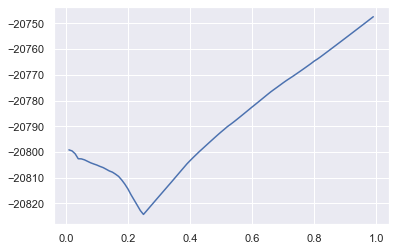

In [37]:
import seaborn as sns
sns.set()
_ = plt.plot(alpha,error)

In [38]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-20747.461114


In [39]:
# let's compare to random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-14853.938667555418

In [40]:
# tuning models with GridsearchCV 

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'),
              'max_features':('auto','sqrt','log2')}

In [41]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [43]:
print(gs.best_score_)
gs.best_estimator_

-14803.052949118939


RandomForestRegressor()

In [44]:
# testing ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))

18854.675424213616
18842.02180743994
11107.181208053691


In [47]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14169.138717316588

In [48]:
# storing the model

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

##### Just to make sure it works

In [49]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [50]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 35.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [51]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))[0]

51925.0